### Contents
### 1.0 Import libraries
### 2.0 Import data
### 3.0 Creating a crosstab and sending it to excel via the clipboard
### 4.0 Create a Regional segmentation
### 5.0 looking for a relationship between spending habits and region
### 6.0 creating a subset excluding low-activity customers
### 7.0 creating profiling variables
#### 7.1 age
### 8.0 export data 


## 1.0 Import libraries 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import scipy

## 2.0 Import data


In [2]:
# create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"

In [3]:
# import ords_prods_cust
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
#have a look
print('ords_prods_cust shape: ', ords_prods_cust.shape)
ords_prods_cust.head(10)

ords_prods_cust shape:  (32404859, 31)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
ords_prods_cust = ords_prods_cust.drop(columns = '_merge')

In [6]:
ords_prods_cust.shape


(32404859, 30)

In [7]:
#check ords_prods_cust column names
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [8]:
#import departments_wrangled.csv
dpts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [9]:
#take a look
print('dpts shape:', dpts.shape)
dpts.head(30)

dpts shape: (21, 2)


,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
#rename unamed column
dpts.columns = ['department_id', 'department']

In [11]:
#take a look
dpts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
#merge dpts and ords_prods_cust
df_large = ords_prods_cust.merge(dpts, on = 'department_id', indicator = False)

In [13]:
#check it out
print('df_large shape: ', df_large.shape)
df_large.head(15)

df_large shape:  (32404859, 31)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages


In [14]:
#check the counts
df_large[['department_id','department']].value_counts(dropna = False)

department_id  department     
4              produce            9479291
16             dairy eggs         5398747
19             snacks             2887550
7              beverages          2688123
1              frozen             2234743
13             pantry             1875369
3              bakery             1172428
15             canned goods       1068058
20             deli               1051249
9              dry goods pasta     866627
17             household           738666
12             meat seafood        708927
14             breakfast           703033
11             personal care       447572
18             babies              423802
6              international       269253
5              alcohol             153696
8              pets                 97716
21             missing              69145
2              other                36291
10             bulk                 34573
Name: count, dtype: int64

In [15]:
# overwriting
ords_prods_cust = df_large

## 3.0 Creating a crosstab and sending it to excel via the clipboard

In [16]:
# create a subset of days_since_prior_order and order_number
crosstab = pd.crosstab(ords_prods_cust['days_since_prior_order'], ords_prods_cust['order_number'], dropna = False)

In [17]:
#saving it to the clipboard
crosstab.to_clipboard()

In [18]:
# creating a crosstab of age & n_dependants
crosstab_1 = pd.crosstab(ords_prods_cust['age'], ords_prods_cust['n_dependants'], dropna = False)

In [19]:
#saving to the clipboard
crosstab_1.to_clipboard()

## How many customers do we have?


In [20]:
# which column names are there?
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department'],
      dtype='object')

In [21]:
# how many user_ids?
ords_prods_cust['user_id'].nunique()

206209

## Using Excel as a Pyton text editor

In [22]:
#what columns do we have?
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department'],
      dtype='object')

### Task Questions (part 1)

## 4.0 Create a regional subsection

In [23]:
#list the state names so that we list the right spellings
ords_prods_cust['state'].value_counts(dropna = False).sort_index()

state
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

In [24]:
#create a 'region' column and a region flag begining with 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [25]:
# now for midwest
ords_prods_cust.loc[ords_prods_cust['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [26]:
# now for south
ords_prods_cust.loc[ords_prods_cust['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [27]:
# and for West
ords_prods_cust.loc[ords_prods_cust['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [28]:
# check it out
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region'],
      dtype='object')

In [29]:
#check it out
ords_prods_cust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       6963553
Northeast     5722736
NaN            633772
Name: count, dtype: int64

## Who are the NaNs?


In [30]:
df_nan = ords_prods_cust[ords_prods_cust['region'].isnull() == True]

In [31]:
df_nan['state'].value_counts(dropna = False)

state
South Dakota    633772
Name: count, dtype: int64

## Fixing the NaNs by adding South Dakota to Midwest

In [32]:
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Dakota', 'region'] = 'Midwest'

In [33]:
#checking it out
ords_prods_cust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# 5.0 looking for a relationship between spending habits and region


In [34]:
#group our spending flag by region
ords_prods_cust.groupby('region')['spending_flag'].value_counts(dropna = False)

region     spending_flag
Midwest    Low spender       7441350
           High spender       155975
Northeast  Low spender       5614511
           High spender       108225
South      Low spender      10582194
           High spender       209691
West       Low spender       8132559
           High spender       160354
Name: count, dtype: int64

In [35]:
# check the totals
ords_prods_cust['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

C:\Users\Asus 17\AppData\Local\Temp\ipykernel_1200\1803734341.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 4000000.0, '4000000'),
 Text(0, 6000000.0, '6000000'),
 Text(0, 8000000.0, '8000000'),
 Text(0, 10000000.0, '10000000'),
 Text(0, 12000000.0, '12000000')]

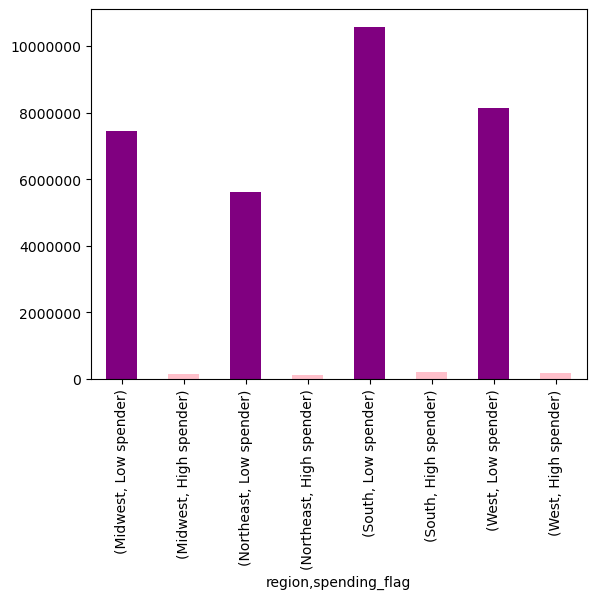

In [36]:
#check it out as a chart
ords_prods_cust.groupby('region')['spending_flag'].value_counts(dropna = False).plot.bar(color = ['purple', 'pink'])
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

## doing it with a crosstab

In [37]:
#creating a crosstab of region and spending flag

regional_spending = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [38]:
# checking it out
regional_spending.shape


(4, 2)

In [39]:
regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


C:\Users\Asus 17\AppData\Local\Temp\ipykernel_1200\2736544780.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 4000000.0, '4000000'),
 Text(0, 6000000.0, '6000000'),
 Text(0, 8000000.0, '8000000'),
 Text(0, 10000000.0, '10000000'),
 Text(0, 12000000.0, '12000000')]

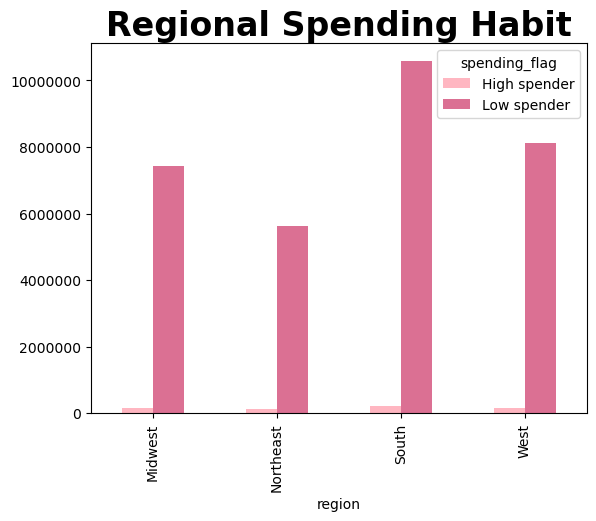

In [40]:
regional_spending_bar = regional_spending.plot.bar(color = ['lightpink', 'palevioletred'])
plt.title('Regional Spending Habit', fontsize = 24, fontweight = 'bold')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

# 6.0 creating a subset excluding low-activity customers


In [41]:
#create an exclusion_flag column for low-activity customers (less than 5 orders)
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'customer_activity'] = 'Low'

In [42]:
# and a flag for high-activity customers (5 or more orders)
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'customer_activity'] = 'High'

In [43]:
#have a look at the counts
ords_prods_cust['customer_activity'].value_counts(dropna = False)

customer_activity
High    30964564
Low      1440295
Name: count, dtype: int64

In [44]:
# create a sample without the low activity customers
ords_prods_cust_new = ords_prods_cust[ords_prods_cust['customer_activity'] == 'High']

In [45]:
# check it out
print('ords_prods_cust_new shape:', ords_prods_cust_new.shape)
ords_prods_cust_new.head(10)

ords_prods_cust_new shape: (30964564, 33)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,department,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High


In [46]:
#drop the exclusion flag
ords_prods_cust_new = ords_prods_cust_new.drop(columns = 'customer_activity')

In [47]:
#check it
ords_prods_cust_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region'],
      dtype='object')

# 7.0 Creating Profiling Variables

## 7.1 age

In [48]:
#creating a new profiling column to flag a customer's age group first < 35
ords_prods_cust_new.loc[ords_prods_cust_new['age'] < 35, 'age_group'] = 'young'

In [49]:
#Then 35-64
ords_prods_cust_new.loc[(ords_prods_cust_new['age'] >= 35) & (ords_prods_cust_new['age'] < 65), 'age_group'] = 'middle'

In [50]:
#the > 65
ords_prods_cust_new.loc[ords_prods_cust_new['age'] >= 65, 'age_group'] = 'old'

In [51]:
# check it out
ords_prods_cust_new['age_group'].value_counts(dropna = False)

age_group
middle    14526725
young      8242295
old        8195544
Name: count, dtype: int64

### age bar

C:\Users\Asus 17\AppData\Local\Temp\ipykernel_1200\3662144316.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000')]

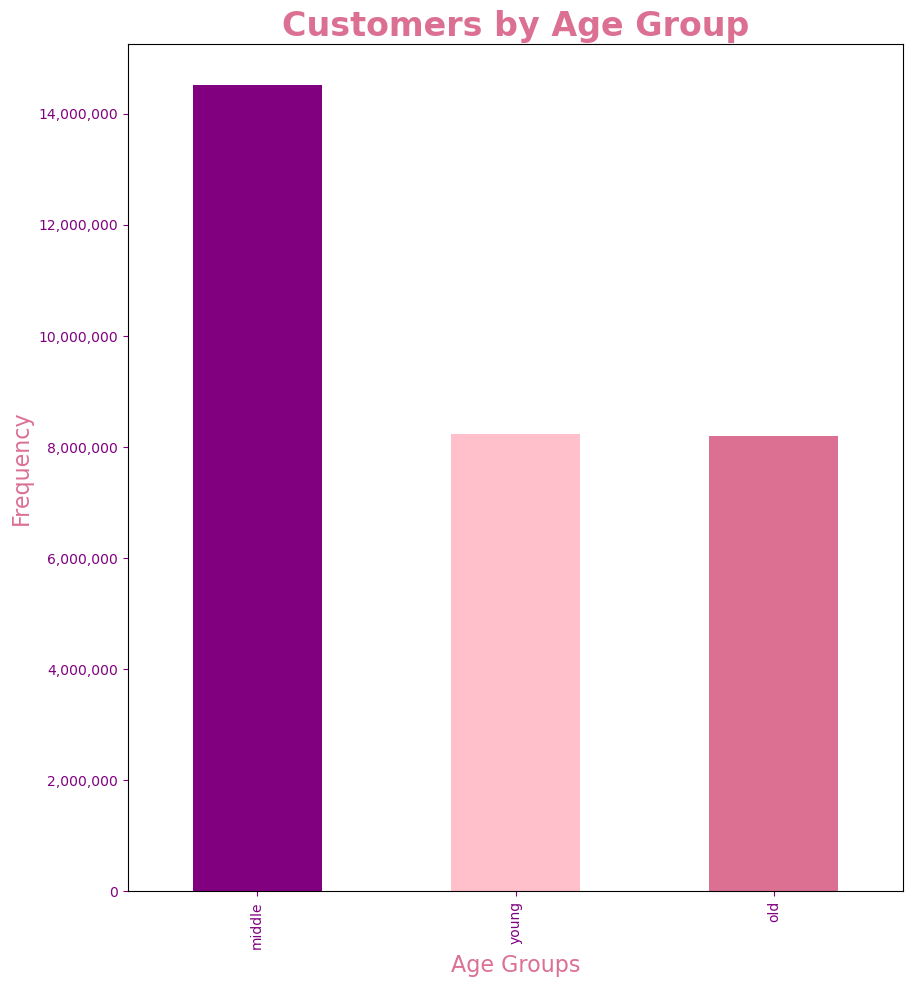

In [52]:
#create a figure space so that my axis labels will all fit when I export a .png
age_group_bar_fig, ax = plt.subplots(figsize = (10, 11))
# create a bar chart of the customers by Age Group
age_group_bar = ords_prods_cust_new['age_group'].value_counts(dropna = False).plot.bar(color = ['purple', 'pink', 'palevioletred'])
# Add Labels and Title
plt.xlabel('Age Groups', fontsize = 16, color = 'palevioletred')
plt.ylabel('Frequency', fontsize = 16, color = 'palevioletred')
plt.title('Customers by Age Group', fontsize = 24, fontweight = 'bold', color = 'palevioletred')
# Axis colours
plt.tick_params(axis = 'both', labelcolor = 'purple', color = 'purple')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [53]:
#export vis
age_group_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar.png'))

### spread of age in regions


In [54]:
#making  a crosstab of age and regions
regional_age = pd.crosstab(ords_prods_cust_new['region'], ords_prods_cust_new['age_group'])

In [55]:
# check the size
regional_age.shape

(4, 3)

In [56]:
# take a look
regional_age

age_group,middle,old,young
region,,,
Midwest,3445594,1904046,1911873
Northeast,2511803,1484807,1468075
South,4834220,2708461,2768458
West,3735108,2098230,2093889


C:\Users\Asus 17\AppData\Local\Temp\ipykernel_1200\375953419.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1000000'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 3000000.0, '3000000'),
 Text(0, 4000000.0, '4000000'),
 Text(0, 5000000.0, '5000000'),
 Text(0, 6000000.0, '6000000')]

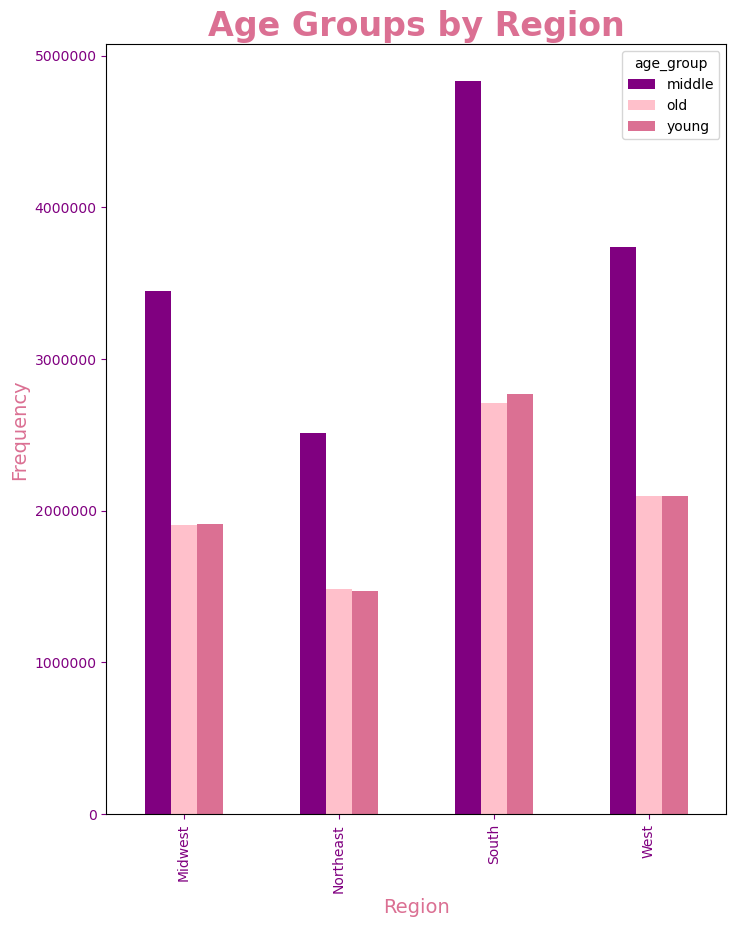

In [57]:
#create a figure space so that my axis labels will all fit when I export a .png
regional_age_bar_fig, ax = plt.subplots(figsize = (8, 10))
#pop a chart in it
regional_age_bar = regional_age.plot.bar(color = ['purple', 'pink', 'palevioletred'], ax = ax)
# Add Labels and Title
ax.set_xlabel('Region', fontsize = 14, color = 'palevioletred')
ax.set_ylabel('Frequency', fontsize = 14, color = 'palevioletred')
ax.set_title('Age Groups by Region', fontsize = 24, fontweight = 'bold', color = 'palevioletred')
# Axis colours
ax.tick_params(axis = 'both', labelcolor = 'purple', color = 'purple')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


In [58]:
# export vis
regional_age_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_age_bar.png'))

## spread of age groups in order_day_of_week

In [59]:
# make a crosstabe of age_groups and order_day_of_week
dow_age = pd.crosstab(ords_prods_cust_new['order_day_of_week'], ords_prods_cust_new['age_group'])

In [60]:
#check shape
dow_age.shape

(7, 3)

In [61]:
#have a look
dow_age

age_group,middle,old,young
order_day_of_week,,,
0,2766921,1566244,1575445
1,2537011,1417495,1457180
2,1894980,1065170,1064556
3,1719880,978350,971305
4,1700115,956161,968718
5,1893657,1066115,1073957
6,2014161,1146009,1131134


In [62]:
# Define Day Names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

In [63]:
#replace the numbers
dow_age = dow_age.rename(index = day_names)

In [64]:
#have a look
dow_age

age_group,middle,old,young
order_day_of_week,,,
Saturday,2766921,1566244,1575445
Sunday,2537011,1417495,1457180
Monday,1894980,1065170,1064556
Tuesday,1719880,978350,971305
Wednesday,1700115,956161,968718
Thursday,1893657,1066115,1073957
Friday,2014161,1146009,1131134


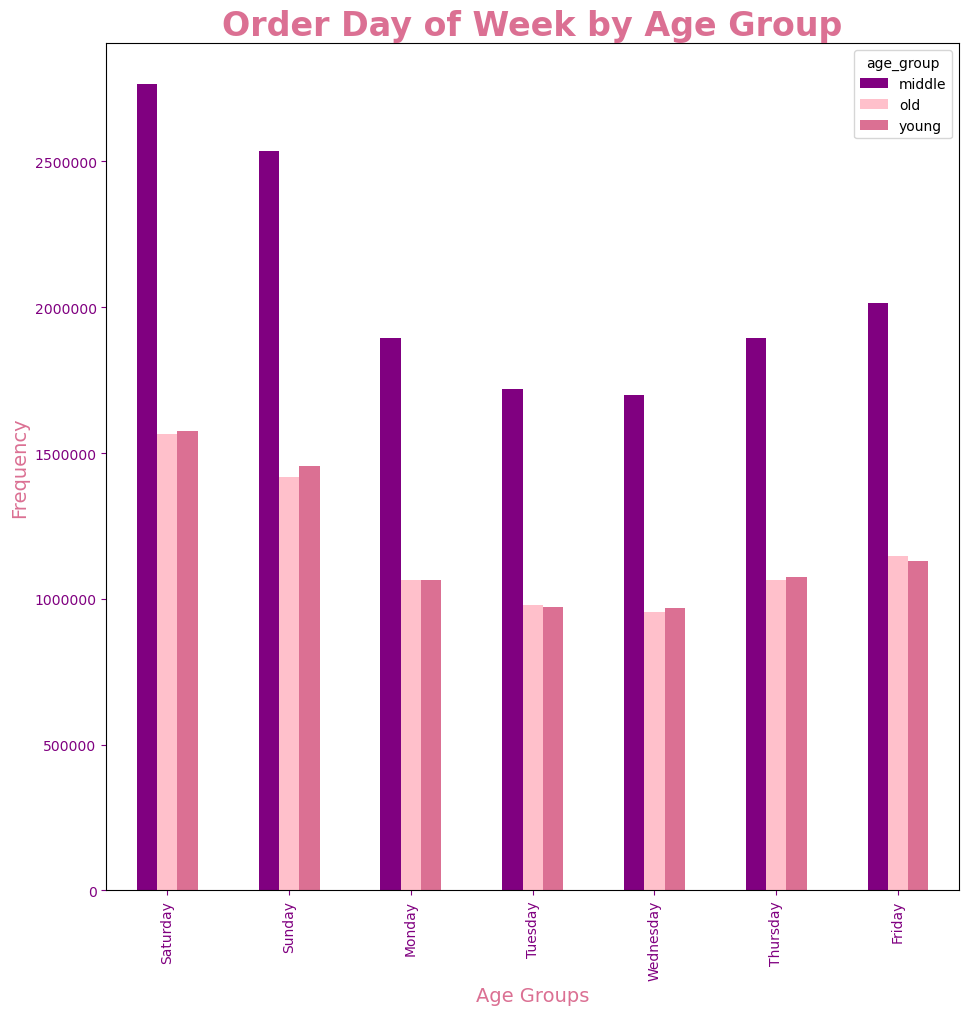

In [65]:
#create a figure space so that my axis labels will all fit when I export a .png
dow_age_bar_fig, ax = plt.subplots(figsize = (11, 11))
# create a bar chart of the customers by Age Group
dow_age_bar = dow_age.plot.bar(color = ['purple', 'pink', 'palevioletred'], ax = ax)
# Add Labels and Title
ax.set_xlabel('Age Groups', fontsize = 14, color = 'palevioletred')
ax.set_ylabel('Frequency', fontsize = 14, color = 'palevioletred')
ax.set_title('Order Day of Week by Age Group', fontsize = 24, fontweight = 'bold', color = 'palevioletred')
# Axis colours
ax.tick_params(axis = 'both', labelcolor = 'purple', color = 'purple')
# Use ScalarFormatter to prevent scientific notation
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)

In [66]:
# export vis
dow_age_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_age_bar.png'))

# 8.0 Export Data

In [67]:
# export ords_prods_cust_new
ords_prods_cust_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_without_low_activity.pkl'))

In [68]:
# export ords_prods_cust with the added depts and the activity flag while we're here
ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))